<a href="https://colab.research.google.com/github/Urayy/UAS_DATAMINING/blob/main/201220049_Stroke_UASDATAMINING_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#Load DataSet
from google.colab import  drive
drive.mount('/content/drive')
data= pd.read_csv("/content/drive/MyDrive/Stroke Dataset.csv");
data

Mounted at /content/drive


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [2]:
#cek data kosong
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [3]:
#Handling missing value dengan mean data
import math
data['bmi'].fillna(math.floor(data['bmi'].mean()),inplace=True)
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.0,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


<ipython-input-4-9ba64f83232b>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelasi = data.corr()


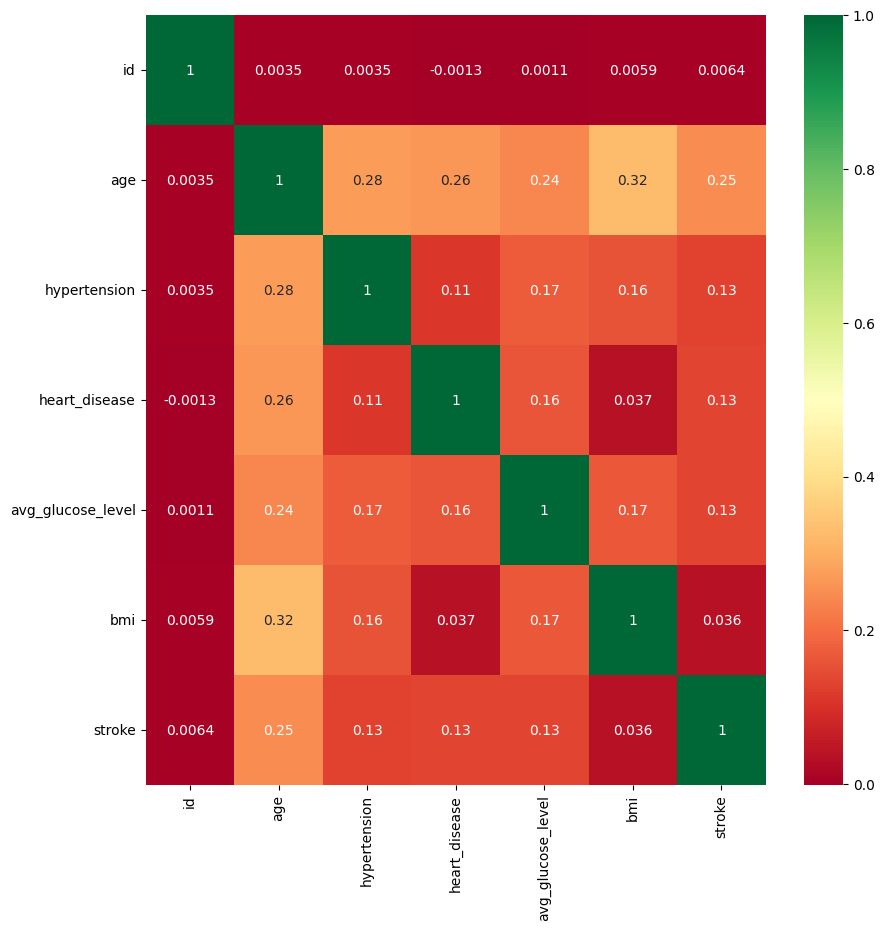

In [4]:
#Korelasi Menggunakan HeatMap
import seaborn as sns

korelasi = data.corr()
feature = korelasi.index
plt.figure(figsize=(10,10))

#plot heat map
g=sns.heatmap(data[feature].corr(),annot=True,cmap="RdYlGn")

In [5]:
# Mengecek apakah ada nilai nol pada colom umur
print('Banyak Baris Nilai nol untuk Age:{0}'.format(len(data.loc[data['age']==0])))

Banyak Baris Nilai nol untuk Age:0


In [6]:
# Menunjukan Korelasi di dalam tabel
data.corr()

<ipython-input-6-97e25b75af9a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.005877,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.324079,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.158050,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.036665,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.166635,0.131945
bmi,0.005877,0.324079,0.158050,0.036665,0.166635,1.000000,0.035751
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.035751,1.000000


In [7]:
# Menunjukan Stastika
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.858102,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699976,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.000000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
#Membuang column yang tidak di perlukan
data=data.drop(['id'],axis=1)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.0,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.0,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [9]:
#Transformasi data
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
data['gender']=encode.fit_transform(data['gender'].values)
data['work_type']=encode.fit_transform(data['work_type'].values)
data['Residence_type']=encode.fit_transform(data['Residence_type'].values)
data['ever_married']=encode.fit_transform(data['ever_married'].values)
data['smoking_status']=encode.fit_transform(data['smoking_status'].values)

In [10]:
#Checking Skewness
stroke_true_count = len(data.loc[data['stroke']==True])
stroke_false_count =len(data.loc[data['stroke']==0])

In [11]:
#View
(stroke_true_count,stroke_false_count)

(249, 4861)

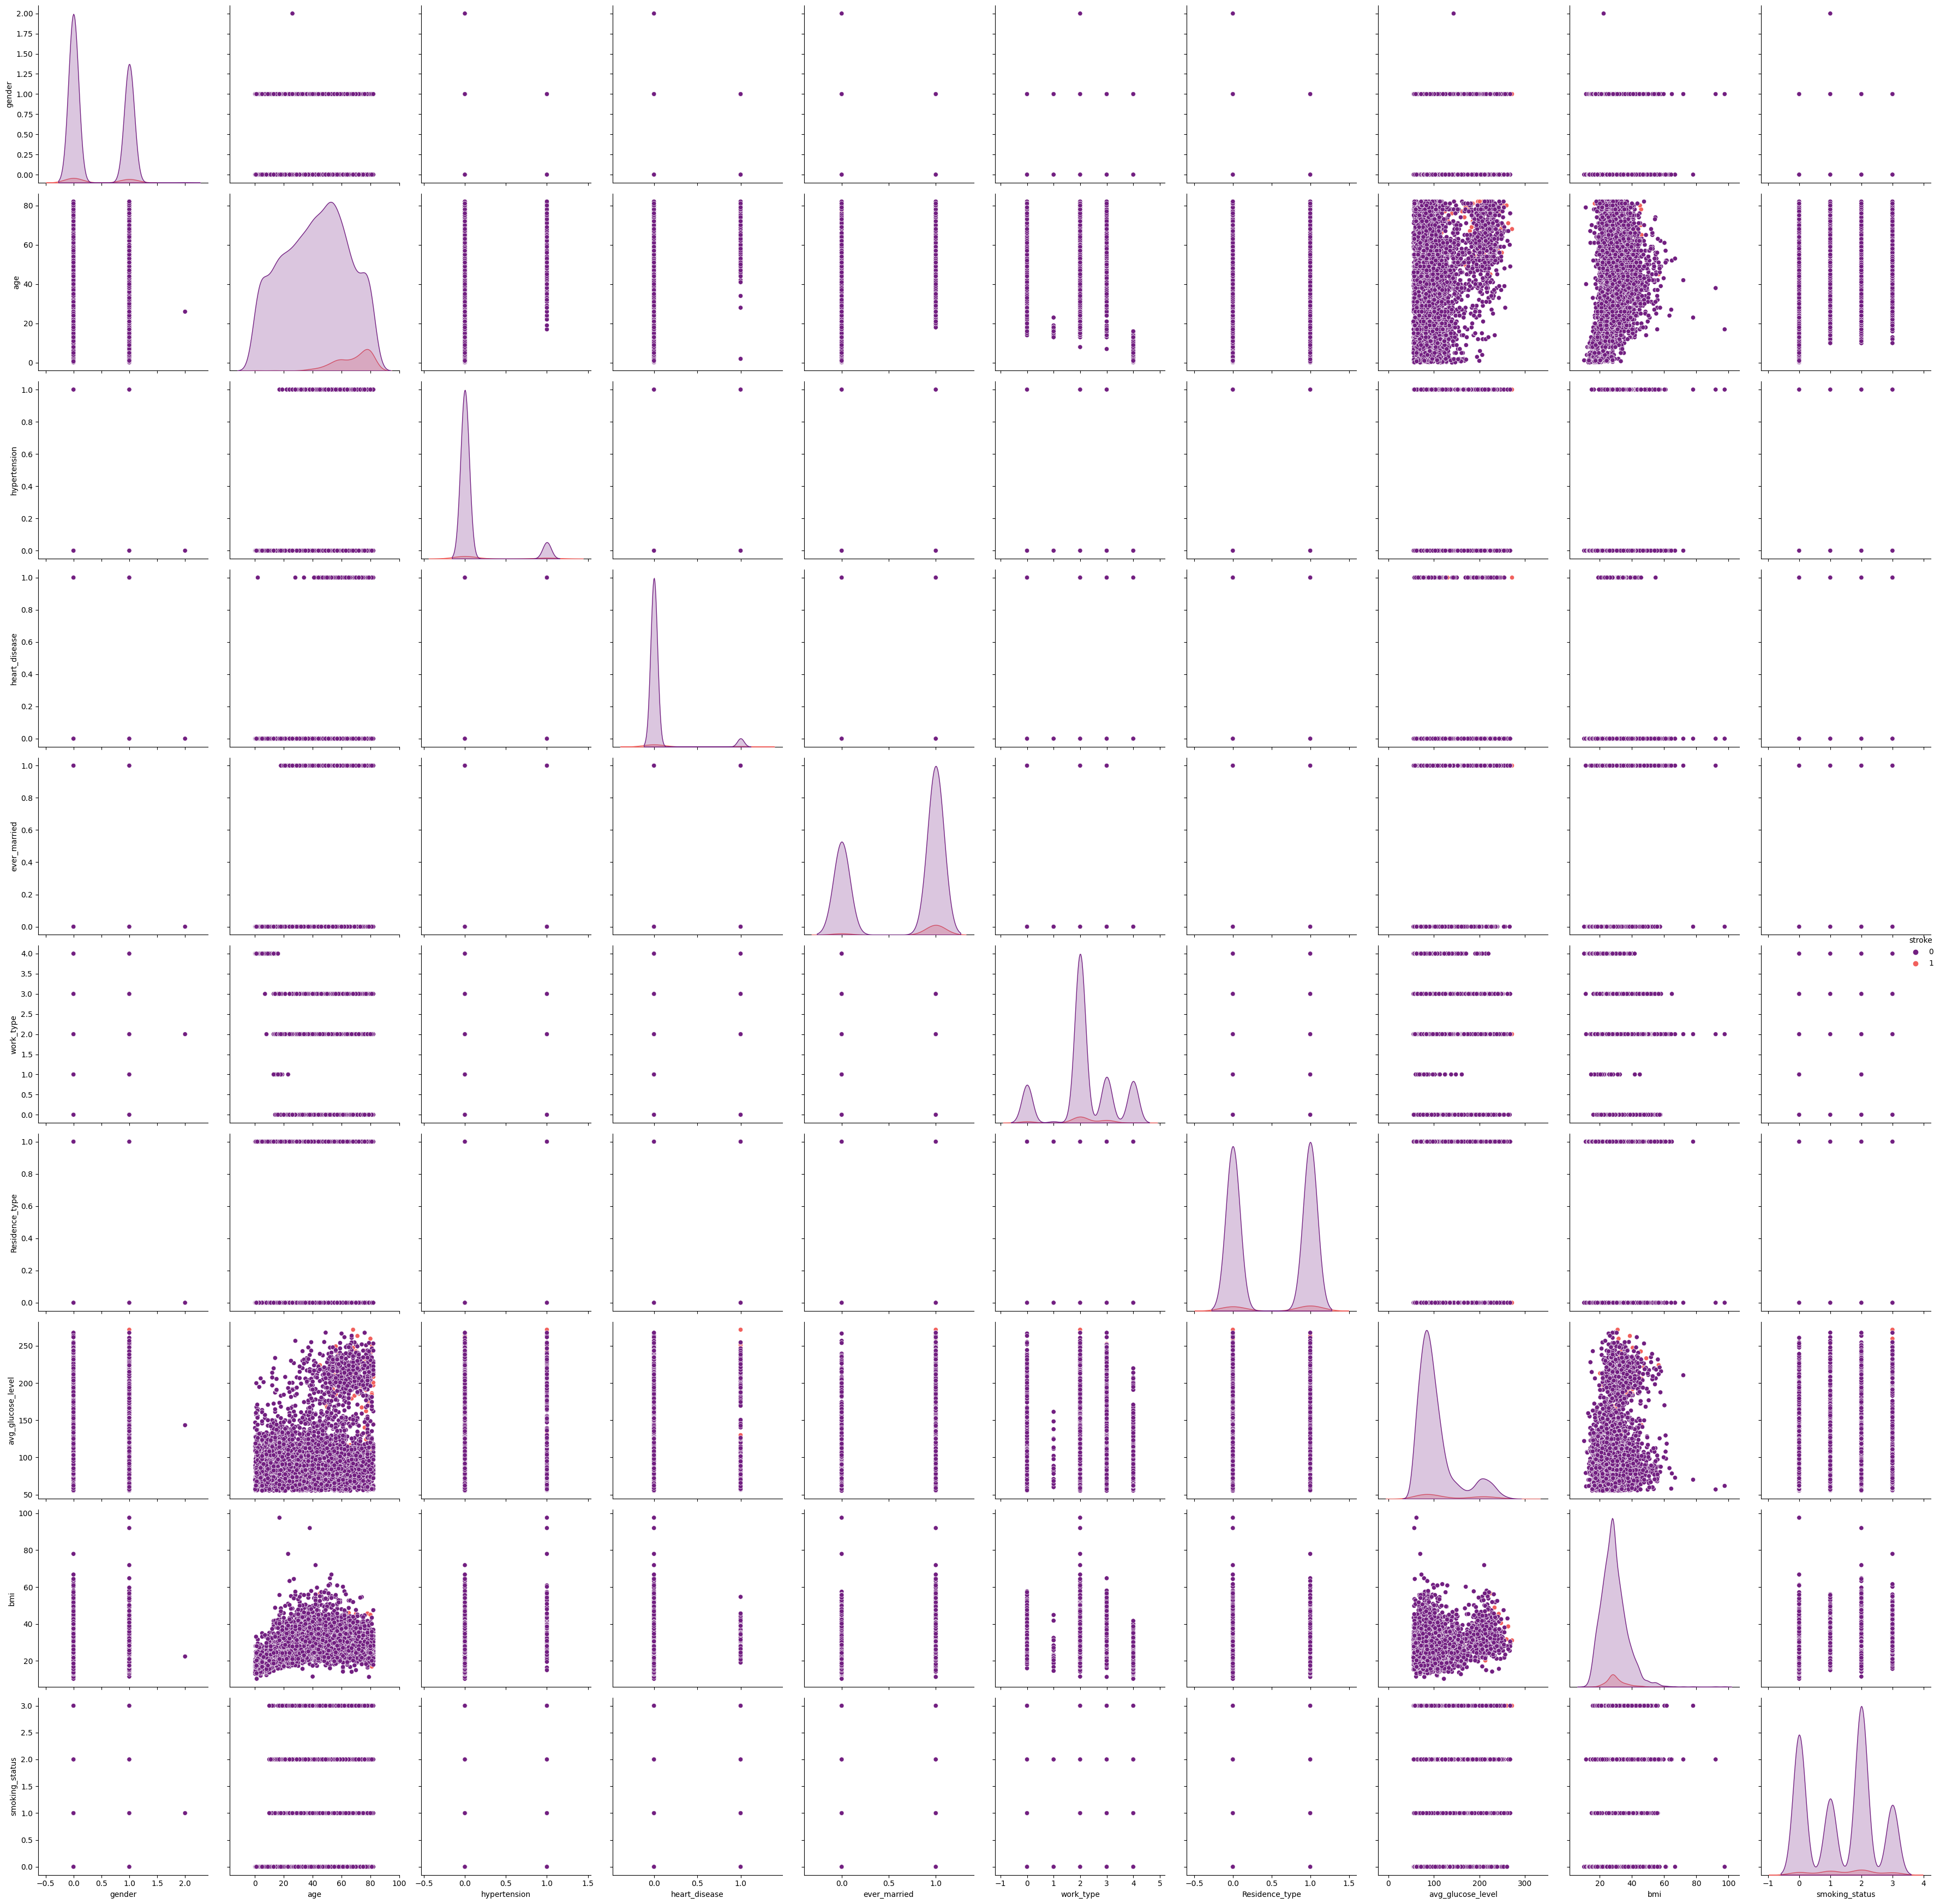

In [12]:
#Make PairPlot
sns.pairplot(data,hue="stroke",palette='magma',height=3.5)
plt.tight_layout()

In [13]:
from sklearn.model_selection import train_test_split
X  = data.drop('stroke',axis=1)
y = data['stroke']

In [14]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
1,0,61.0,0,0,1,3,0,202.21,28.0,2
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.0,2
5106,0,81.0,0,0,1,3,1,125.20,40.0,2
5107,0,35.0,0,0,1,3,0,82.99,30.6,2
5108,1,51.0,0,0,1,2,0,166.29,25.6,1


In [15]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [19]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

In [20]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
802,1,79.00,0,0,1,3,0,112.64,28.5,1
3927,0,62.00,0,0,1,2,1,88.32,36.3,0
2337,0,21.00,0,0,0,2,0,59.52,33.7,2
3910,1,31.00,0,0,1,0,1,65.70,30.4,1
1886,0,31.00,0,0,0,2,0,59.63,19.9,2
...,...,...,...,...,...,...,...,...,...,...
4426,1,43.00,0,0,1,0,0,88.00,30.6,2
466,0,61.00,1,0,1,2,0,170.05,60.2,3
3092,0,1.16,0,0,0,4,1,97.28,17.8,0
3772,1,80.00,0,0,1,3,0,196.08,31.0,1


In [21]:
X_train.shape

(4088, 10)

In [22]:
y_train.shape

(4088,)

In [23]:
X_test.shape


(1022, 10)

In [24]:
y_test.shape

(1022,)

In [25]:
from xgboost import XGBClassifier

# buat XGBoostClassifier
XGB_model = XGBClassifier()

In [26]:
XGB_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [27]:
#Prediction
xgb_prediction=XGB_model.predict(X_test)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,xgb_prediction))

[[952   8]
 [ 58   4]]


In [29]:
print(classification_report(y_test,xgb_prediction))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.33      0.06      0.11        62

    accuracy                           0.94      1022
   macro avg       0.64      0.53      0.54      1022
weighted avg       0.91      0.94      0.91      1022



In [30]:
import pickle

pickle.dump(XGB_model,open('XGB.pkl','wb'))

In [31]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.1
    Uninstalling importlib-metadata-7.0.1:
      Successfully uninstalled importlib-metadata-7.0.1


In [35]:
! pip install pandas-profiling==3.2.0
! pip install ydata-profiling
! pip install streamlit-pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=8df59cb009c325f826f0531f96f0cdec674bf1d2955ec8908acabe2c9ceb037d
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: joblib
    Found existing installation: joblib 1.3.2
    Uninstalling joblib-1.3.2:
      Successfully uninstalled joblib-1.3.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.8 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.13
    Uninstalling pydantic-1.10.13:
      Successfully uninstalled pydantic-1.10.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dep

In [32]:
%%writefile app.py

Writing app.py


In [33]:
! wget -q -O - ipv4.icanhazip.com

35.237.57.249


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501

[..................] / rollbackFailedOptional: verb npm-session 7f018c1a51c9398


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.237.57.249:8501

npx: installed 22 in 5.648s
your url is: https://cuddly-views-shine.loca.lt
/content/app.py:9: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
2024-01-11 14:21:10.149 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 534, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 19, in <module>
    data = pd.read_csv('Stroke Dataset.csv')
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/p